In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline

In [32]:
def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param X: the pandas dataframe
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    print(vif_df)
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print ('Features above VIF threshold:\n')
    print (vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print ('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

In [2]:
os.chdir("..")
os.chdir(os.getcwd()+"\Data")

In [28]:
df = pd.read_csv("logistic_output_train.csv", index_col=0)
df.drop(['LogisticScore', 'AdjustedScore'], axis=1, inplace=True)
print('Number of columns - ',df.shape[1],'\nNumber of rows - ',df.shape[0])

Number of columns -  18 
Number of rows -  31550


In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

In [29]:
print(df.describe())

             IS_SAR  JRSDCN_CD_NEW  CUST_BUS_RISK_NB        CR_AMT  \
count  31550.000000   31550.000000      31550.000000  31550.000000   
mean       0.017813       4.024152          3.891759      4.218517   
std        0.132273       0.153524          2.875128      1.363620   
min        0.000000       4.000000          0.000000      0.000000   
25%        0.000000       4.000000          2.000000      4.065471   
50%        0.000000       4.000000          4.000000      4.520600   
75%        0.000000       4.000000          6.000000      4.987571   
max        1.000000       5.000000         10.000000      7.453999   

             DR_AMT  CR_TRANS_AMT_INCR  DR_TRANS_AMT_INCR  LOG_INCOMING_WIRE  \
count  31550.000000       3.155000e+04       3.155000e+04       31550.000000   
mean       4.210420       2.725196e+06       2.261775e+05           1.822152   
std        1.140452       4.274655e+08       1.804892e+07           2.070889   
min        0.000000      -1.000000e+02      -1.00

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31550 entries, 1 to 50018
Data columns (total 18 columns):
IS_SAR                          31550 non-null int64
JRSDCN_CD_NEW                   31550 non-null int64
CUST_BUS_RISK_NB                31550 non-null int64
CR_AMT                          31550 non-null float64
DR_AMT                          31550 non-null float64
CR_TRANS_AMT_INCR               31550 non-null float64
DR_TRANS_AMT_INCR               31550 non-null float64
LOG_INCOMING_WIRE               31550 non-null float64
LOG_OUTGOING_CASH               31550 non-null float64
LOG_OUTGOING_WIRE               31550 non-null float64
PCT_ATM_TRXN_OUT_AM             31550 non-null float64
PCT_CASH_TRXN_OUT_AM            31550 non-null float64
PCT_WIRE_TRXN_OUT_AM            31550 non-null float64
PCT_ATM_TRXN_IN_AM              31550 non-null int64
MAX_DAILY_DEPST_AM_RATIO_GT1    31550 non-null int64
AGE_YR_CT                       31550 non-null int64
COUNTRY                

In [6]:
print(df['IS_SAR'].value_counts())

0    30988
1      562
Name: IS_SAR, dtype: int64


In [7]:
SAR = df.loc[df['IS_SAR'] == 1]
not_SAR = df.loc[df['IS_SAR'] == 0]

In [8]:
for i in range(len(list(SAR.columns))):
    print(i, SAR.columns[i])

0 IS_SAR
1 JRSDCN_CD_NEW
2 CUST_BUS_RISK_NB
3 CR_AMT
4 DR_AMT
5 CR_TRANS_AMT_INCR
6 DR_TRANS_AMT_INCR
7 LOG_INCOMING_WIRE
8 LOG_OUTGOING_CASH
9 LOG_OUTGOING_WIRE
10 PCT_ATM_TRXN_OUT_AM
11 PCT_CASH_TRXN_OUT_AM
12 PCT_WIRE_TRXN_OUT_AM
13 PCT_ATM_TRXN_IN_AM
14 MAX_DAILY_DEPST_AM_RATIO_GT1
15 AGE_YR_CT
16 COUNTRY
17 CUST_DAYS_OPEN_LE_100


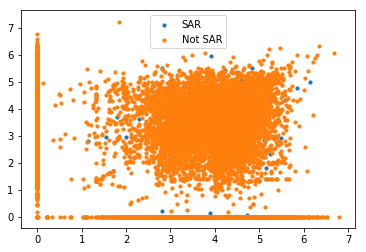

In [9]:
plt.scatter(SAR.iloc[:, 7], SAR.iloc[:, 9], s=10, label='SAR')
plt.scatter(not_SAR.iloc[:,7], not_SAR.iloc[:, 9], s=10, label='Not SAR')
plt.legend()
plt.show()

C:\Users\WF465HJ\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


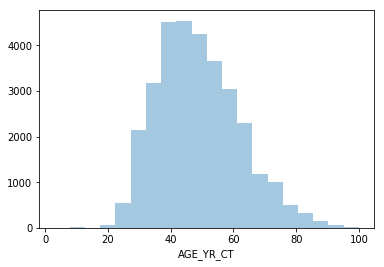

In [10]:
sns.distplot(df.AGE_YR_CT.dropna(), kde=False, bins = 20)

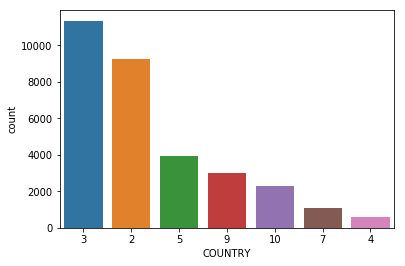

In [11]:
sns.countplot(df.COUNTRY.dropna(), order = df.COUNTRY.value_counts().index)

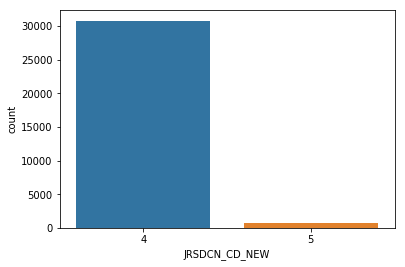

In [12]:
sns.countplot(df.JRSDCN_CD_NEW.dropna(), order = df.JRSDCN_CD_NEW.value_counts().index)

C:\Users\WF465HJ\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


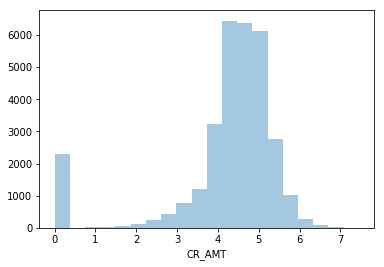

In [13]:
sns.distplot(df.CR_AMT.dropna(), kde=False, bins = 20)

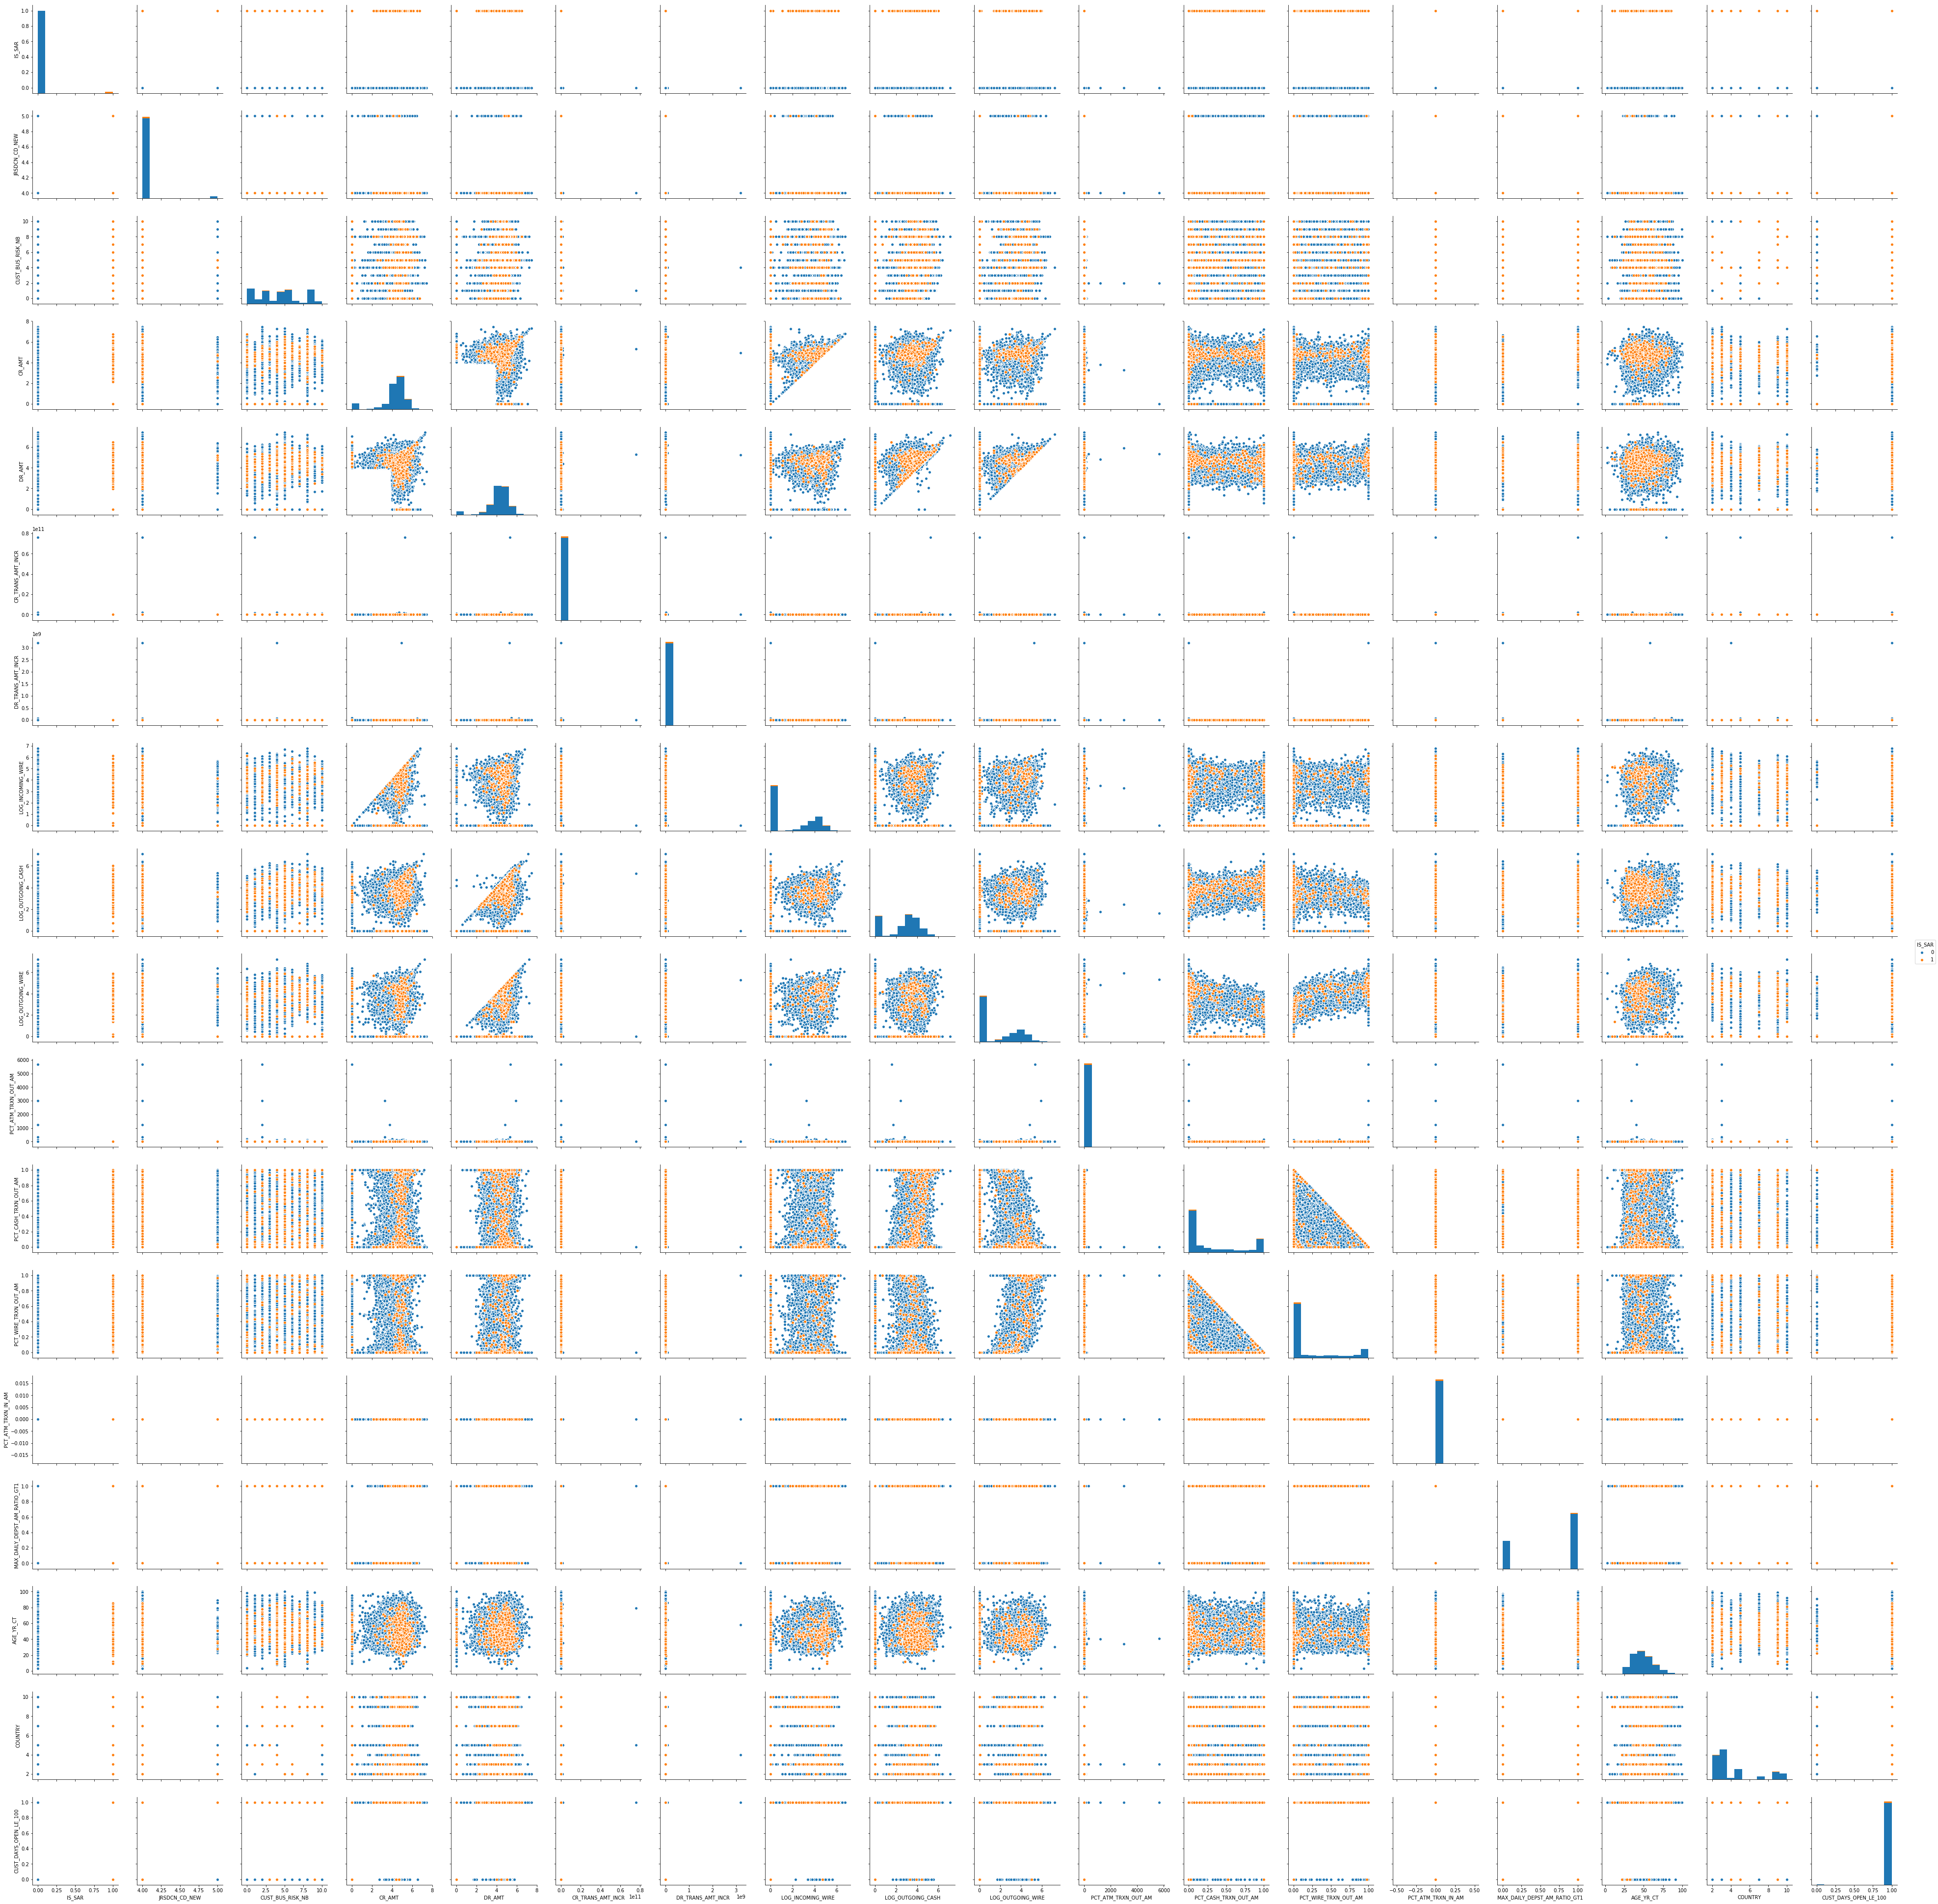

In [15]:
sns.pairplot(df, hue="IS_SAR",size = 3)
plt.show()

In [19]:
train_out = calculate_vif(df) 

C:\Users\WF465HJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Iteration no.
1
[1.0261529409449632, 167.74919489096936, 4.0206806515562565, 16.518763081898133, 18.90419960459644, 1.000686494061825, 1.0008995203437738, 2.5800363372653714, 6.53825318776868, 6.311617242998991, 1.0013104855329877, 2.845139118389878, 4.862874287999396, nan, 4.384238013934797, 15.200724442212083, 4.5827375231793, 154.6051348180839]
Max VIF is for variable no.:
13
Iteration no.
2
[1.0261529409449632, 167.74919489096936, 4.020680651556253, 16.51876308189816, 18.90419960459644, 1.0006864940618256, 1.0008995203437738, 2.5800363372653714, 6.53825318776868, 6.311617242998991, 1.001310485532987, 2.845139118389879, 4.862874287999396, 4.384238013934797, 15.200724442212032, 4.582737523179297, 154.60513481807328]
Max VIF is for variable no.:
1
Iteration no.
3
[1.026034721522663, 4.020101576491959, 16.18431651647847, 18.331228132342357, 1.0006700620999838, 1.0008977962103445, 2.5740888798570483, 6.538230203423832, 6.311487343076283, 1.0013094983454978, 2.824986021964216, 4.84498766

In [20]:
train_out.shape

(31550, 11)

In [21]:
df.shape

(31550, 18)

In [34]:
train_out.columns

Index(['IS_SAR', 'JRSDCN_CD_NEW', 'CUST_BUS_RISK_NB', 'CR_AMT', 'DR_AMT',
       'CR_TRANS_AMT_INCR', 'DR_TRANS_AMT_INCR', 'LOG_INCOMING_WIRE',
       'LOG_OUTGOING_CASH', 'LOG_OUTGOING_WIRE', 'PCT_ATM_TRXN_OUT_AM',
       'PCT_CASH_TRXN_OUT_AM', 'PCT_WIRE_TRXN_OUT_AM', 'PCT_ATM_TRXN_IN_AM',
       'MAX_DAILY_DEPST_AM_RATIO_GT1', 'AGE_YR_CT', 'COUNTRY',
       'CUST_DAYS_OPEN_LE_100'],
      dtype='object')

In [23]:
df.columns

Index(['IS_SAR', 'JRSDCN_CD_NEW', 'CUST_BUS_RISK_NB', 'CR_AMT', 'DR_AMT',
       'CR_TRANS_AMT_INCR', 'DR_TRANS_AMT_INCR', 'LOG_INCOMING_WIRE',
       'LOG_OUTGOING_CASH', 'LOG_OUTGOING_WIRE', 'PCT_ATM_TRXN_OUT_AM',
       'PCT_CASH_TRXN_OUT_AM', 'PCT_WIRE_TRXN_OUT_AM', 'PCT_ATM_TRXN_IN_AM',
       'MAX_DAILY_DEPST_AM_RATIO_GT1', 'AGE_YR_CT', 'COUNTRY',
       'CUST_DAYS_OPEN_LE_100'],
      dtype='object')

In [33]:
train_out = calculate_vif_(df) 

                                       0
const                         954.884604
IS_SAR                          1.008041
JRSDCN_CD_NEW                   1.019342
CUST_BUS_RISK_NB                1.420744
CR_AMT                          1.577061
DR_AMT                          1.304387
CR_TRANS_AMT_INCR               1.000650
DR_TRANS_AMT_INCR               1.000743
LOG_INCOMING_WIRE               1.455171
LOG_OUTGOING_CASH               1.854206
LOG_OUTGOING_WIRE               3.650994
PCT_ATM_TRXN_OUT_AM             1.001029
PCT_CASH_TRXN_OUT_AM            1.721631
PCT_WIRE_TRXN_OUT_AM            3.470880
PCT_ATM_TRXN_IN_AM                   NaN
MAX_DAILY_DEPST_AM_RATIO_GT1    1.464378
AGE_YR_CT                       1.078699
COUNTRY                         1.295118
CUST_DAYS_OPEN_LE_100           1.003065
Features above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []


C:\Users\WF465HJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
